In [2]:
# Task 1 : Logistic Regression based Classifier (LR)
# 1. Logistic Regression based classifier construction. (Mini-batch gradient descent). Once again, do not call
# library function for logistic regression fit method.
# 1.1 Use a 10-fold cross validation strategy to obtain the best set of hyper-parameter values of the logistic
# regression. Please report a discussion why you would choose the values. (On the training set)

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataBX = pd.read_csv('Set-B.X.csv')


In [3]:
dataBX.shape

(100000, 19)

In [4]:
dataBX[1:6]

,amount,hour1,state1,zip1,custAttr1,field1,custAttr2,field2,hour2,flag1,total,field3,field4,indicator1,indicator2,flag2,flag3,flag4,flag5
1,38.85,0,WA,980,1234567890123457,3,pfixyiqfpvkcg@zjyxs.net,1,0,0,38.85,5497,14,1,0,0,1,0,1
2,38.85,0,KY,402,1234567890123458,2,shbjoldciswwm@aol.com,1,0,0,38.85,-4420,23,0,0,1,1,0,1
3,12.95,0,CA,958,1234567890123459,3,ipbvtdfkhhfws@sbcglobal.net,0,0,0,12.95,5010,31,0,0,1,0,0,1
4,38.85,0,GA,300,1234567890123460,3,ivfuvxiennhdp@bellsouth.net,1,0,0,38.85,-4074,21,0,0,1,0,0,1
5,12.95,0,AZ,852,1234567890123461,3,gmlvcqewyyczt50@hotmail.com,0,0,1,12.95,-2753,24,0,0,1,1,0,1


In [18]:
dataBX1 = dataBX[['amount','total']]

In [19]:
dataBY = pd.read_csv('Set-B.Y.csv')

In [20]:
dataBY.shape

(99999, 1)

In [21]:
dataBX1 = dataBX1.drop(index=99999)


KeyError: '[99999] not found in axis'

In [22]:
from sklearn.model_selection import train_test_split
#train_test_split will randomly split the data 

main_test,main_train , main_testy, main_trainy  =train_test_split(dataBX1,dataBY,test_size=0.8) 

print(len(main_train))
#print(len(test))
print(main_train.size)
print(main_train.shape)
#train

80000
160000
(80000, 2)


In [23]:
main_train['Y']= main_trainy

C:\Users\kusha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
type(main_train)

pandas.core.frame.DataFrame

In [25]:
main_train.shape

(80000, 3)

In [29]:
from sklearn.model_selection import KFold

#kf = KFold(n_splits=10 ,random_state=None, shuffle=True)
# data = kf.get_n_splits(dataAX)
# print(data)

# kf = KFold(n_splits=10,shuffle=True, random_state = None)
# for train, test in kf.split(dataAX):
#     print('train: %s, test: %s' % (dataAX[train], dataAX[test]))


kf = KFold(n_splits = 10, shuffle = True, random_state =None)
result = next(kf.split(main_train), None)
print (result)


train = main_train.iloc[result[0]]
test =  main_train.iloc[result[1]]

(array([    0,     1,     2, ..., 79997, 79998, 79999]), array([    7,    19,    36, ..., 79974, 79980, 79982]))


In [30]:
print(len(train))
print(len(test))

72000
8000


In [31]:
print(train.shape)

(72000, 3)


In [32]:
print(test.shape)

(8000, 3)


In [33]:
train.columns

Index(['amount', 'total', 'Y'], dtype='object')

In [34]:
trainy = train["Y"]

In [35]:
trainy.shape


(72000,)

In [36]:
trainy = trainy.values


In [37]:
import gc
gc.collect()


0

In [38]:
dfx = train.drop(labels='Y', axis=1)

In [39]:
dfx.shape

(72000, 2)

In [40]:
gc.collect()

0

In [41]:
trainx = dfx.values

In [42]:
print(type(trainx))
print(type(trainy))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [46]:
trainy = np.reshape(trainy,(-1,1))

In [47]:
trainy.shape

(72000, 1)

In [48]:
print(trainy)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [49]:
print(trainx)

[[25.9  25.9 ]
 [12.95 12.95]
 [38.85 38.85]
 ...
 [38.85 38.85]
 [38.85 38.85]
 [12.95 12.95]]


In [50]:
trainx.shape

(72000, 2)

In [51]:
gc.collect()

0

In [52]:
import gc
gc.collect()
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
scaled_train = sc.fit_transform(trainx)

In [53]:
scaled_train = np.insert(scaled_train, 0, 1.0, axis=1)
print(scaled_train)
print(scaled_train.shape)

[[1.         0.43202669 0.43202669]
 [1.         0.21601334 0.21601334]
 [1.         0.64804003 0.64804003]
 ...
 [1.         0.64804003 0.64804003]
 [1.         0.64804003 0.64804003]
 [1.         0.21601334 0.21601334]]
(72000, 3)


In [54]:
trainy.shape

(72000, 1)

In [55]:
import gc
gc.collect()

0

In [57]:
import math
alpha = 0.01
#epoch = 20
w = np.random.rand(3,1)
#b_size = 32
#teta1 =mbgd(scaled_train,trainy,w,alpha)
gc.collect()
def cmb(X, y, batch_size): 
    mini_batches = [] 
    data = np.column_stack((X, y))
    #print(data.shape)
    np.random.shuffle(data) 
    n_minibatches = data.shape[0] // batch_size 
    i = 0
    gc.collect()
    for i in range(n_minibatches + 1): 
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        #a=mini_batches.append((X_mini, Y_mini)) 
        gc.collect()
    if data.shape[0] % batch_size != 0: 
        mini_batch = data[i * batch_size:data.shape[0]] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        #a =mini_batches.append((X_mini, Y_mini)) 
        print(X_mini)
        print(Y_mini)
        #print(a)
    #return mini_batches 
    gc.collect()
    return X_mini,Y_mini


def mbgd(x,y,teta, alpha):
    b_size = 32
    epoch =1
    for g in range(epoch):
#         print(x.shape)
#         print(y.shape)
        #m_batches = cmb(x,y,b_size)
        x_mini , y_mini = cmb(x,y,b_size)
        print("hi")
        gc.collect()
        for h in range(b_size):
            #X_mini, y_mini = m_batches
            #y_pred = np.dot(x[i],teta)
#             print(x_mini)
#             print(x_mini.shape)
#             print(y_mini.shape)
            z= np.dot(x_mini,w)
            h= 1 / (1 + np.exp(-z))
            #error[] = h-y_mini
            #error = h - y_mini
            error = - (y_mini*np.log(h) + (1-y_mini)*np.log(1- h))
#              j = x[i]*(error)
#             grad = np.reshape(j,(-1,1))
            gc.collect()
            grad = np.dot(x_mini.T,error)
            teta = teta -(alpha*grad)
    return teta

       
teta1 =mbgd(scaled_train,trainy,w,alpha)

hi


In [58]:
print(teta1)

[[0.71581486]
 [0.35528871]
 [0.00525099]]


In [50]:
# 1.2 Train the classifier on the training set, and report the training confusion matrix, accuracy, precision, recall,
# F1-score, the ROC curve and the corresponding AUC score.

In [59]:
testy = test["Y"]
print(testy.shape)
testy = testy.values
print(type(testy))
testy = np.reshape(testy,(-1,1))


(8000,)
<class 'numpy.ndarray'>


In [60]:
testx =test.drop(labels='Y', axis=1)

In [61]:
# df_dummy=pd.get_dummies(testx)
# print(df_dummy)
# xtestx = df_dummy.values
import gc
gc.collect()
from sklearn.preprocessing import MinMaxScaler
sca = MinMaxScaler()
scaled_test = sca.fit_transform(testx)
scaled_test = np.insert(scaled_test, 0, 1.0, axis=1)
print(scaled_test)
print(scaled_test.shape)

[[1.         0.64804003 0.64804003]
 [1.         0.21601334 0.21601334]
 [1.         0.33277731 0.33277731]
 ...
 [1.         0.64804003 0.64804003]
 [1.         0.43202669 0.43202669]
 [1.         0.21601334 0.21601334]]
(8000, 3)


In [62]:
print(scaled_test.shape)
print(teta1.shape)

(8000, 3)
(3, 1)


In [63]:
print(teta1)

[[0.71581486]
 [0.35528871]
 [0.00525099]]


In [64]:
ypred = scaled_test.dot(teta1)

print(ypred)

[[0.94945902]
 [0.79369625]
 [0.83579429]
 ...
 [0.94945902]
 [0.87157763]
 [0.79369625]]


In [69]:
ypred_new = 1 / (1 + np.exp(-ypred))
print(ypred_new)

[[0.72100637]
 [0.68862444]
 [0.69757871]
 ...
 [0.72100637]
 [0.70507386]
 [0.68862444]]


In [70]:
print(len(ypred_new))

8000


In [71]:
threshold = 0.5
for i in range(ypred_new.shape[0]):
    if ypred_new[i] >= threshold:
        ypred_new[i] =1
        #print("inside if")
    else:
        ypred_new[i] = 0
       # print("inside else")
    
print(ypred_new)

[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


In [73]:
threshold = 0.5
for i in range(ypred.shape[0]):
    if ypred[i] >= threshold:
        ypred[i] =1
       # print("inside if")
    else:
        ypred[i] = 0
       # print("inside else")
    
print(ypred)

[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


In [74]:
print(len(testy))
print(len(ypred))

8000
8000


In [75]:
from sklearn.metrics import confusion_matrix
confusion_matrix(testy,ypred_new)

array([[   0, 7775],
       [   0,  225]], dtype=int64)

In [76]:
    from sklearn.metrics import confusion_matrix
    confusion_matrix(testy,ypred)

array([[   0, 7775],
       [   0,  225]], dtype=int64)

In [77]:
from sklearn.metrics import confusion_matrix
tp, fn, fp, tn = confusion_matrix(testy,ypred_new).ravel()
#t= confusion_matrix(testy,ypred_new)
print("tn=",tn)
print("fp=",fp)
print("fn=",fn)
print("tp=",tp)

tn= 225
fp= 0
fn= 7775
tp= 0


In [78]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
accuracy = accuracy_score(testy, ypred_new)
f1score = f1_score(testy,ypred_new,average='weighted')
recall = recall_score(testy,ypred_new,average='weighted')
precision = precision_score(testy,ypred_new,average='weighted')


C:\Users\kusha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\kusha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [79]:
print("accuracy =" , accuracy)
print("F1score =" , f1score)
print("recal =" ,recall)
print("precision =", precision)

accuracy = 0.028125
F1score = 0.0015387537993920971
recal = 0.028125
precision = 0.000791015625


In [80]:
# roc curve

import numpy as np
from sklearn import metrics
N =fp+tn
P = tp+fn
FPR= fp/N
TPR=tp/P

In [81]:
fpr, tpr, threshold = metrics.roc_curve(testy,ypred_new)
roc_auc = metrics.auc(fpr, tpr)
print(fpr)
print(tpr)
print(threshold)
print(roc_auc)

[0. 1.]
[0. 1.]
[2. 1.]
0.5


In [82]:
print(FPR)
print(TPR)
print(tpr)
print(fpr)

0.0
0.0
[0. 1.]
[0. 1.]


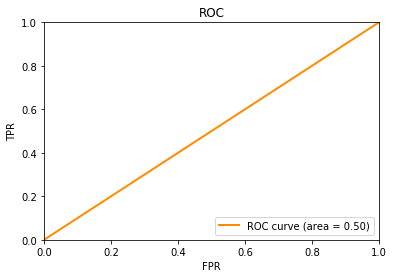

In [84]:

import matplotlib.pyplot as plt
plt.figure()

plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim(fpr)
plt.ylim(tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [85]:
from sklearn import metrics
AUC = metrics.auc(fpr, tpr)
print(AUC)

0.5


In [ ]:

# 1.3 Using the model, test the test set, and report the testing confusion matrix, accuracy, precision, recall, F1-
# score, the ROC curve and the corresponding AUC score.

In [86]:
main_test.shape

(19999, 2)

In [87]:
len(main_test)

19999

In [88]:
main_train.shape

(80000, 3)

In [89]:
import gc
gc.collect()
from sklearn.preprocessing import MinMaxScaler
sca11 = MinMaxScaler()
scaled_maintest = sca11.fit_transform(main_test)
scaled_maintest = np.insert(scaled_maintest, 0, 1.0, axis=1)
print(scaled_maintest)
print(scaled_maintest.shape)

[[1.         0.43202669 0.43202669]
 [1.         0.21601334 0.21601334]
 [1.         0.21601334 0.21601334]
 ...
 [1.         0.21601334 0.21601334]
 [1.         0.83319433 0.83319433]
 [1.         0.21601334 0.21601334]]
(19999, 3)


In [90]:
ypred_maintest = scaled_maintest.dot(teta1)
print(ypred_maintest)

[[0.87157763]
 [0.79369625]
 [0.79369625]
 ...
 [0.79369625]
 [1.01621449]
 [0.79369625]]


In [91]:
ypred_maintest_new = 1 / (1 + np.exp(-ypred_maintest))
print(ypred_maintest_new)

[[0.70507386]
 [0.68862444]
 [0.68862444]
 ...
 [0.68862444]
 [0.73423457]
 [0.68862444]]


In [93]:
threshold = 0.5
for i in range(ypred_maintest_new.shape[0]):
    if ypred_maintest_new[i] >= threshold:
        ypred_maintest_new[i] =1
       # print("inside if")
    else:
        ypred_maintest_new[i] = 0
       # print("inside else")
    
print(ypred_maintest_new)

[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


In [94]:
from sklearn.metrics import confusion_matrix
confusion_matrix(main_testy,ypred_maintest_new)

array([[    0, 19435],
       [    0,   564]], dtype=int64)

In [95]:
from sklearn.metrics import confusion_matrix
tp_test, fn_test, fp_test, tn_test = confusion_matrix(main_testy,ypred_maintest_new).ravel()
#t= confusion_matrix(testy,ypred_new)
print("tn=",tn_test)
print("fp=",fp_test)
print("fn=",fn_test)
print("tp=",tp_test)

tn= 564
fp= 0
fn= 19435
tp= 0


In [96]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
accuracy_test = accuracy_score(main_testy,ypred_maintest_new)
f1score_test = f1_score(main_testy,ypred_maintest_new,average='weighted')
recall_test = recall_score(main_testy,ypred_maintest_new,average='weighted')
precision_test = precision_score(main_testy,ypred_maintest_new,average='weighted')

print("accuracy =" , accuracy_test)
print("F1score =" , f1score_test)
print("recal =" ,recall_test)
print("precision =", precision_test)

accuracy = 0.028201410070503526
F1score = 0.0015470111637177445
recal = 0.028201410070503526
precision = 0.0007953195299646977


C:\Users\kusha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\kusha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [97]:
import numpy as np
from sklearn import metrics
N_test =fp_test+tn_test
P_test = tp_test+fn_test
FPR_test= fp_test/N_test
TPR_test=tp_test/P_test

In [98]:
fpr_test, tpr_test, threshold_test = metrics.roc_curve(main_testy,ypred_maintest_new)
roc_auc = metrics.auc(fpr_test, tpr_test)
print(fpr_test)
print(tpr_test)
print(threshold_test)


[0. 1.]
[0. 1.]
[2. 1.]


In [99]:
print(FPR_test)
print(TPR_test)

0.0
0.0


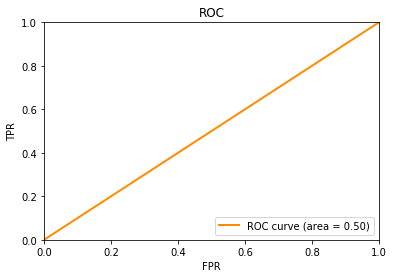

In [100]:
plt.figure()

plt.plot(fpr_test, tpr_test, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [101]:
from sklearn import metrics
AUC_test = metrics.auc(fpr_test, tpr_test)
print(AUC_test)

0.5


In [ ]:
# 1.4 Looking at results obtained in Tasks 1.2 and 1.3: Is your classifier showing any sign of overfitting, or
# underfitting? And explain why do you think that. If yes, can you suggest a solution, and utilize it to solve the
# issue (if present).

In [ ]:
# accuracy is very low which means it is a clear case of under fitting . it is because the training data is very less than
#test data
# solution would be to either increase training data or reduce the test data used 

In [ ]:
# 1.5 (Graduate Student Requirement) Dataset follows a highly skewed distribution in terms of the target class
# label. Can you devise a workaround to this? Please explain and redo tasks 1.1, 1.2, 1.3, and 1.4.

In [ ]:
#WE CAN DO UNDER SAMPLING AS SHOWN BELOW

Skewness: 5.891257
2654
Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            99989, 99990, 99991, 99992, 99993, 99994, 99995, 99996, 99997,
            99998],
           dtype='int64', length=97345)
[46377 26390 78794 ... 64458 95400 72394]
Int64Index([  111,   157,   181,   191,   201,   217,   219,   220,   275,
              280,
            ...
            99803, 99835, 99851, 99857, 99901, 99905, 99909, 99924, 99928,
            99942],
           dtype='int64', length=2654)
[  111   157   181 ... 64458 95400 72394]
       0
111    1
157    1
181    1
191    1
201    1
217    1
219    1
220    1
275    1
280    1
296    1
335    1
343    1
352    1
619    1
642    1
643    1
652    1
660    1
788    1
812    1
825    1
875    1
963    1
966    1
1016   1
1031   1
1045   1
1074   1
1093   1
...   ..
99172  0
12423  0
59874  0
23761  0
53735  0
16169  0
74357  0
67947  0
54647  0
79189  0
57937  0
82495  0
54981  

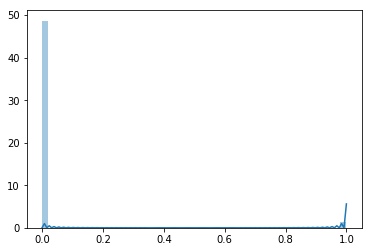

In [185]:
import seaborn as sns
sns.distplot(dataBY);

print("Skewness: %f" % dataBY.skew())

no_frauds = len(dataBY[dataBY['0'] == 1])
print(no_frauds)

non_fraud_indices = dataBY[dataBY['0'] == 0].index
print(non_fraud_indices)

random_indices = np.random.choice(non_fraud_indices,no_frauds, replace=False)
print(random_indices)

fraud_indices = dataBY[dataBY['0'] == 1].index
print(fraud_indices)

under_sample_indices = np.concatenate([fraud_indices,random_indices])
print(under_sample_indices)

under_sample = dataBY.loc[under_sample_indices]
print(under_sample)

In [ ]:
# Task 2 : Naive Bayes Classifier (NB)
# 2. Naive Bayes Classifier construction considering the log likelihood strategy with Laplace based smoothing
# for discrete variables, and Gaussian smoothing for the continuous variables to estimate the corresponding
# conditional probabilities. Once again, do not call library function for Naive Bayes classification’s fit method.
# 2.1 We do not have any hyper-parameters to train here. Then, simply report the 5-fold cross validation
# performance in terms of accuracy, precision, recall, F1-score. (On the training set)

In [105]:
print(dataBX.shape)
print(dataBY.shape)

(99999, 19)
(99999, 1)


In [106]:
#print(dataAX.head(2))

In [108]:
import gc
gc.collect()

0

In [109]:
main_train.columns

Index(['amount', 'total', 'Y'], dtype='object')

In [110]:
#main_test.columns

In [111]:
# df_dum = df_dum[['amount','total','y']]
main_train1 = main_train[['amount','total','Y']]
#main_test1 = main_test[['amount','total','Y']]

In [23]:
#df_dum = df_dum[['amount','total']]

In [112]:
from sklearn.model_selection import KFold
kfo = KFold(n_splits = 5, shuffle = True, random_state =None)
res = next(kfo.split(main_train1), None)
print (res)




(array([    2,     4,     5, ..., 79996, 79997, 79999]), array([    0,     1,     3, ..., 79969, 79989, 79998]))


In [113]:
tr = main_train1.iloc[res[0]]
te = main_train1.iloc[res[1]]

In [114]:
tr_y= tr["Y"]
tr_y = tr_y.values
tr_y = np.reshape(tr_y,(-1,1))
print(type(tr_y))
tr_y1 = tr_y[:5000, :]

<class 'numpy.ndarray'>


In [115]:
print(tr_y.shape)
print(tr_y1.shape)
gc.collect()

(64000, 1)
(5000, 1)


0

In [116]:

gc.collect()
tr_x = tr.drop(labels='Y', axis=1)
print(tr_x.shape)
tr_x1 = tr_x.iloc[0:5000]
print(type(tr_x))

print(tr_x1.shape)

(64000, 2)
<class 'pandas.core.frame.DataFrame'>
(5000, 2)


In [117]:
tr_x1 = tr_x1.values



In [118]:
print(type(tr_x1))

<class 'numpy.ndarray'>


In [119]:
gc.collect()
from sklearn.preprocessing import MinMaxScaler
sca = MinMaxScaler()
stra = sca.fit_transform(tr_x1)
#stra = np.insert(stra, 0, 1.0, axis=1)

In [120]:
te_y= te["Y"]
te_y = te_y.values
te_y = np.reshape(te_y,(-1,1))
print(type(te_y))
te_y1 = te_y[:5000, :]

print(te_y.shape)
print(te_y1.shape)
gc.collect()


gc.collect()
te_x = te.drop(labels='Y', axis=1)
print(tr_x.shape)
te_x1 = te_x.iloc[0:5000]
print(type(te_x))

print(te_x1.shape)

te_x1 = te_x1.values

print(type(te_x1))

<class 'numpy.ndarray'>
(16000, 1)
(5000, 1)
(64000, 2)
<class 'pandas.core.frame.DataFrame'>
(5000, 2)
<class 'numpy.ndarray'>


In [121]:
gc.collect()
from sklearn.preprocessing import MinMaxScaler
sca = MinMaxScaler()
ste = sca.fit_transform(te_x1)
#ste = np.insert(ste, 0, 1.0, axis=1)

In [122]:
import random
import math
from scipy.special import expit

def separateByClass(dataset):
	separated = {}
	for i in range(len(dataset)):
		vector = dataset[i]
		if (vector[-1] not in separated):
			separated[vector[-1]] = []
		separated[vector[-1]].append(vector)
	return separated

def mean(numbers):
	return sum(numbers)/float(len(numbers))
 
def stdev(numbers):
	avg = mean(numbers)
	variance = sum([pow(x-avg,2) for x in numbers])/float(len(numbers)-1)
	return math.sqrt(variance)
 
def summarize(dataset):
	summaries = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)]
	del summaries[-1]
	return summaries
 
def summarizeByClass(dataset):
	separated = separateByClass(dataset)
	summaries = {}
	for classValue, instances in separated.items():
		summaries[classValue] = summarize(instances)
	return summaries
 
def calculateProbability(x, mean, stdev):
	#exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2)))) 
    m =(2*math.pow(stdev,2))
  
    if(m == 0):
        m= 0.005
    
    p = -(math.pow(x-mean,2)/m)
    #p = -(math.pow(x-mean,2)/(2*variance)
    #print(stdev)
    #q = expit(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
	#r= (1/(math.sqrt(2*math.pi)*stdev))
#     t = math.sqrt(2*math.pi)
#     u = t* stdev
#     v = 1/u
#     s = v*q
    s=expit(p)
    return s


def calculateClassProbabilities(summaries, inputVector):
	probabilities = {}
	for classValue, classSummaries in summaries.items():
		probabilities[classValue] = 1
		for i in range(len(classSummaries)):
			mean, stdev = classSummaries[i]
			x = inputVector[i]
			probabilities[classValue] *= calculateProbability(x, mean, stdev)
	return probabilities
			
def predict(summaries, inputVector):
	probabilities = calculateClassProbabilities(summaries, inputVector)
	bestLabel, bestProb = None, -1
	for classValue, probability in probabilities.items():
		if bestLabel is None or probability > bestProb:
			bestProb = probability
			bestLabel = classValue
	return bestLabel
 
def getPredictions(summaries, testSet):
	predictions = []
	for i in range(len(testSet)):
		result = predict(summaries, testSet[i])
		predictions.append(result)
	return predictions

# def getAccuracy(testSet, predictions):
# 	correct = 0
# 	for i in range(len(testSet)):
# 		if testSet[i][-1] == predictions[i]:
# 			correct += 1
# 	return (correct/float(len(testSet))) * 100.0
 

In [123]:
# prepare model
summaries = summarizeByClass(stra)
print(summaries)
	# test model
predictions = getPredictions(summaries, ste)
#accuracy = getAccuracy(ste, predictions)
#print('Accuracy: {0}%').format(accuracy)

C:\Users\kusha\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars


{0.6540404040404041: [(0.654040404040414, 9.883804432680877e-15)], 0.218013468013468: [(0.218013468013468, 0.0)], 0.1744107744107744: [(0.17441077441077382, 5.838281225262974e-16)], 0.8409090909090909: [(0.8409090909090843, 6.668869340826358e-15)], 0.0: [(0.0, 0.0)], 0.436026936026936: [(0.43602693602693454, 1.4464377872941275e-15)], 0.18535353535353535: [(0.18535353535353502, 3.3434547987153284e-16)], 0.33585858585858586: [(0.3358585858585859, 5.99588961666477e-17)], 0.5232323232323232: [(0.523232323232322, 1.1136443671719466e-15)], 1.0: [(1.0, 0.0)], 0.6727272727272727: [(0.6727272727272724, 3.39411609061636e-16)], 0.556060606060606: [(0.556060606060606, 0.0)], 0.4904040404040404: [(0.4904040404040404, 0.0)], 0.6104377104377104: [(0.6104377104377104, 0.0)], 0.5668350168350168: [(0.5668350168350168, 0.0)], 0.3488215488215488: [(0.34882154882154903, 2.246116798593759e-16)], 0.6212121212121212: [(0.6212121212121212, 0.0)], 0.19612794612794612: [(0.1961279461279461, 2.888891902733299e-17

In [124]:
threshold = 0.5
for i in range(5000):
    if(predictions[i] > threshold):
        predictions[i]=1
    else:
        predictions[i]=0 
    
print(predictions)    



[0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 

# # 2.2 Train the classifier on the training set, and report the training confusion matrix, accuracy, precision, recall,
# F1-score, the ROC curve and the corresponding AUC score.

In [ ]:
# 2.3 Using the model, test the test set, and report the testing confusion matrix, accuracy, precision, recall, F1-
# score, the ROC curve and the corresponding AUC score.

In [ ]:
#this is for train .. test follows 

In [125]:
from sklearn.metrics import confusion_matrix
confusion_matrix(te_y1,predictions)

array([[2427, 2456],
       [  61,   56]], dtype=int64)

In [126]:
from sklearn.metrics import confusion_matrix
tp_test, fn_test, fp_test, tn_test = confusion_matrix(te_y1,predictions).ravel()
#t= confusion_matrix(testy,ypred_new)
print("tn=",tn_test)
print("fp=",fp_test)
print("fn=",fn_test)
print("tp=",tp_test)

tn= 56
fp= 61
fn= 2456
tp= 2427


In [127]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
accuracy_test = accuracy_score(te_y1,predictions)
f1score_test = f1_score(te_y1,predictions,average='weighted')
recall_test = recall_score(te_y1,predictions,average='weighted')
precision_test = precision_score(te_y1,predictions,average='weighted')

print("accuracy =" , accuracy_test)
print("F1score =" , f1score_test)
print("recal =" ,recall_test)
print("precision =", precision_test)

accuracy = 0.4966
F1score = 0.6441140156604591
recal = 0.4966
precision = 0.9531776849898622


In [128]:
import numpy as np
from sklearn import metrics
N_test =fp_test+tn_test
P_test = tp_test+fn_test
FPR_test= fp_test/N_test
TPR_test=tp_test/P_test

In [129]:
fpr_test, tpr_test, threshold_test = metrics.roc_curve(te_y1,predictions)
roc_auc = metrics.auc(fpr_test, tpr_test)
print(fpr_test)
print(tpr_test)
print(threshold_test)

[0.         0.50296949 1.        ]
[0.         0.47863248 1.        ]
[2 1 0]


In [130]:
print(FPR_test)
print(TPR_test)

0.5213675213675214
0.4970305140282613


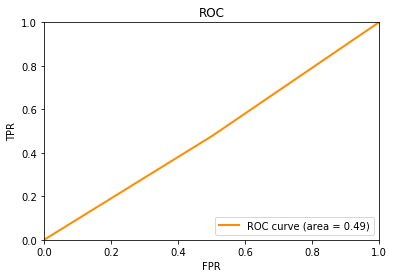

In [131]:
import matplotlib.pyplot as plt
plt.figure()

plt.plot(fpr_test, tpr_test, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [132]:
from sklearn import metrics
AUC_test = metrics.auc(fpr_test, tpr_test)
print(AUC_test)

0.48783149633036993


In [133]:
#test data

In [134]:
summaries1 = summarizeByClass(scaled_maintest)
print(summaries1)
	# test model
predictions_nbtest = getPredictions(summaries1,scaled_maintest)

C:\Users\kusha\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars


{0.4320266889074228: [(1.0, 0.0), (0.4320266889074171, 5.720859837155184e-15)], 0.2160133444537114: [(1.0, 0.0), (0.2160133444537342, 2.2816781907633854e-14)], 0.8331943286071727: [(1.0, 0.0), (0.8331943286071548, 1.787974707640683e-14)], 0.6480400333611342: [(1.0, 0.0), (0.6480400333611916, 5.740261844195332e-14)], 0.1728106755629691: [(1.0, 0.0), (0.17281067556297058, 1.4716708192432382e-15)], 0.9908256880733944: [(1.0, 0.0), (0.9908256880733943, 1.1135420844204956e-16)], 0.5939949958298582: [(1.0, 0.0), (0.5939949958298582, 0.0)], 0.6665554628857381: [(1.0, 0.0), (0.666555462885739, 8.919024545644905e-16)], 0.5829858215179317: [(1.0, 0.0), (0.5829858215179308, 8.949844841335499e-16)], 0.0: [(1.0, 0.0), (0.0, 0.0)], 0.3456213511259382: [(1.0, 0.0), (0.34562135112593695, 1.280765142745659e-15)], 0.5184320266889074: [(1.0, 0.0), (0.5184320266889119, 4.4441755681532715e-15)], 0.1836530442035029: [(1.0, 0.0), (0.18365304420350514, 2.2503215702920446e-15)], 0.20517097581317764: [(1.0, 0.0

In [135]:
threshold = 0.5
for i in range(len(main_testy)):
    if predictions_nbtest[i] >= threshold:
        predictions_nbtest[i] =1
        #print("inside if")
    else:
        predictions_nbtest[i] = 0
       # print("inside else")
    
print(predictions_nbtest)

[0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 

In [137]:
predictions_nbtest

[0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,


tn= 263
fp= 301
fn= 9661
tp= 9774
accuracy = 0.5018750937546878
F1score = 0.6451527270967323
recal = 0.5018750937546878
precision = 0.9435125799274712
[0.         0.49709287 1.        ]
[0.         0.46631206 1.        ]
[2 1 0]
0.5336879432624113
0.5029071263184975


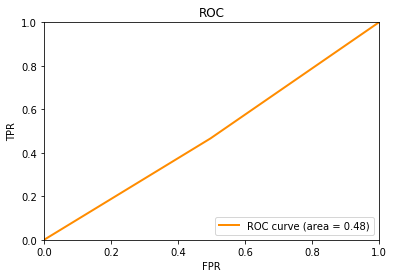

0.4846095915280431


In [138]:
from sklearn.metrics import confusion_matrix
confusion_matrix(main_testy,predictions_nbtest)

from sklearn.metrics import confusion_matrix
tp_nbtest, fn_nbtest, fp_nbtest, tn_nbtest = confusion_matrix(main_testy,predictions_nbtest).ravel()
#t= confusion_matrix(testy,ypred_new)
print("tn=",tn_nbtest)
print("fp=",fp_nbtest)
print("fn=",fn_nbtest)
print("tp=",tp_nbtest)

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
accuracy_nbtest = accuracy_score(main_testy, predictions_nbtest)
f1score_nbtest = f1_score(main_testy, predictions_nbtest,average='weighted')
recall_nbtest = recall_score(main_testy, predictions_nbtest,average='weighted')
precision_nbtest = precision_score(main_testy, predictions_nbtest,average='weighted')

print("accuracy =" , accuracy_nbtest)
print("F1score =" , f1score_nbtest)
print("recal =" ,recall_nbtest)
print("precision =", precision_nbtest)


import numpy as np
from sklearn import metrics
N_nbtest =fp_nbtest+tn_nbtest
P_nbtest = tp_nbtest+fn_nbtest
FPR_nbtest= fp_nbtest/N_nbtest
TPR_nbtest=tp_nbtest/P_nbtest

fpr_nbtest, tpr_nbtest, threshold_nbtest = metrics.roc_curve(main_testy, predictions_nbtest)
roc_auc_nbtest = metrics.auc(fpr_nbtest, tpr_nbtest)
print(fpr_nbtest)
print(tpr_nbtest)
print(threshold_nbtest)



print(FPR_nbtest)
print(TPR_nbtest)



plt.figure()

plt.plot(fpr_nbtest, tpr_nbtest, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc_nbtest)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()



from sklearn import metrics
AUC_nbtest = metrics.auc(fpr_nbtest, tpr_nbtest)
print(AUC_nbtest)


In [184]:
# 2.4 Looking at results obtained in Tasks 2.1, 2.2 and 2.3: Is your classifier showing any sign of overfitting, or
# underfitting? And explain why do you think that. If yes, can you suggest a solution, and utilize it to solve the
# issue (if present).

In [ ]:
## accuracy is very low which means it is a clear case of under fitting . it is because the training data is very less than
#test data
# solution would be to either increase training data or reduce the test data used 

In [ ]:
# 2.5 (Graduate #WE CAN DO UNDER SAMPLING AS SHOWN BELOWStudent Requirement) ) Dataset follows a highly skewed distribution in terms of the target class
# label. Can you devise a workaround to this? Please explain and redo tasks 2.1, 2.2, 2.3, and 2.4.

In [ ]:
#WE CAN DO UNDER SAMPLING AS SHOWN BELOW

Skewness: 5.891257
2654
Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            99989, 99990, 99991, 99992, 99993, 99994, 99995, 99996, 99997,
            99998],
           dtype='int64', length=97345)
[98626 32472 35915 ... 14146 62451 66182]
Int64Index([  111,   157,   181,   191,   201,   217,   219,   220,   275,
              280,
            ...
            99803, 99835, 99851, 99857, 99901, 99905, 99909, 99924, 99928,
            99942],
           dtype='int64', length=2654)
[  111   157   181 ... 14146 62451 66182]
       0
111    1
157    1
181    1
191    1
201    1
217    1
219    1
220    1
275    1
280    1
296    1
335    1
343    1
352    1
619    1
642    1
643    1
652    1
660    1
788    1
812    1
825    1
875    1
963    1
966    1
1016   1
1031   1
1045   1
1074   1
1093   1
...   ..
5297   0
80106  0
35163  0
30017  0
38645  0
49792  0
36585  0
1004   0
76471  0
5887   0
66171  0
25402  0
31946  

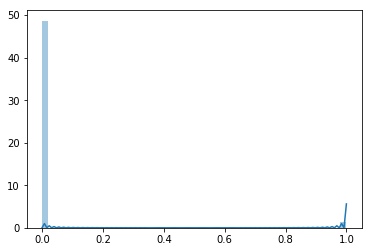

In [186]:
import seaborn as sns
sns.distplot(dataBY);

print("Skewness: %f" % dataBY.skew())

no_frauds = len(dataBY[dataBY['0'] == 1])
print(no_frauds)

non_fraud_indices = dataBY[dataBY['0'] == 0].index
print(non_fraud_indices)

random_indices = np.random.choice(non_fraud_indices,no_frauds, replace=False)
print(random_indices)

fraud_indices = dataBY[dataBY['0'] == 1].index
print(fraud_indices)

under_sample_indices = np.concatenate([fraud_indices,random_indices])
print(under_sample_indices)

under_sample = dataBY.loc[under_sample_indices]
print(under_sample)

In [ ]:
# Task 3 : kNN Classifier (kNN)
# 3. k-NN Classifier construction (considering the normalize to unit vector strategy and Euclidean distance
# measure as discussed in class). Once again, do not call library function for kNN fit method.
# 3.1 Use a 10-fold cross validation strategy to obtain the best hyper-parameter value of the k-NN classifier (i.e.,
# the value of k). Please report a discussion why you would choose the value. (On the training set)

In [139]:
print(dataBX.shape)
print(dataBY.shape)

(99999, 19)
(99999, 1)


In [140]:
from sklearn.model_selection import KFold

In [141]:
kfol = KFold(n_splits = 10, shuffle = True, random_state =None)
re = next(kfol.split(main_train1), None)
print (re)


tra = main_train1.iloc[re[0]]
tes = main_train1.iloc[re[1]]

(array([    0,     1,     2, ..., 79996, 79997, 79998]), array([    6,     9,    25, ..., 79991, 79992, 79999]))


In [142]:
tra1 = tra.iloc[0:50]
tra1 = tra1.values
print(type(tra1))

print(tra1.shape)

<class 'numpy.ndarray'>
(50, 3)


In [143]:
import gc
gc.collect()
from sklearn.preprocessing import MinMaxScaler
scal = MinMaxScaler()
scaled_trax = scal.fit_transform(tra1)

In [144]:
gc.collect()

0

In [145]:
gc.collect()
scaled_trax = np.insert(scaled_trax, 0, 1.0, axis=1)
gc.collect()
print(scaled_trax)
print(scaled_trax.shape)

[[1.         0.43602694 0.43602694 0.        ]
 [1.         0.21801347 0.21801347 0.        ]
 [1.         0.6540404  0.6540404  0.        ]
 [1.         1.         1.         0.        ]
 [1.         0.21801347 0.21801347 0.        ]
 [1.         0.21801347 0.21801347 0.        ]
 [1.         0.6540404  0.6540404  0.        ]
 [1.         0.17441077 0.17441077 0.        ]
 [1.         0.6540404  0.6540404  0.        ]
 [1.         0.21801347 0.21801347 0.        ]
 [1.         0.6540404  0.6540404  0.        ]
 [1.         0.84090909 0.84090909 0.        ]
 [1.         0.         0.         0.        ]
 [1.         0.21801347 0.21801347 0.        ]
 [1.         0.21801347 0.21801347 1.        ]
 [1.         0.84090909 0.84090909 0.        ]
 [1.         0.21801347 0.21801347 0.        ]
 [1.         0.21801347 0.21801347 1.        ]
 [1.         0.6540404  0.6540404  0.        ]
 [1.         0.84090909 0.84090909 0.        ]
 [1.         0.6540404  0.6540404  0.        ]
 [1.         

In [146]:
#scaled_trax['y'] = tra_y1
print(scaled_trax.shape)
print(type(scaled_trax))

(50, 4)
<class 'numpy.ndarray'>


In [147]:
gc.collect()

0

In [148]:
#tes = d.drop(labels='y', axis=1)
tes1 = tes[0:50]
tes_y= tes1["Y"]
tes1=tes1.values
print(type(tes1))

print(tes1.shape)

<class 'numpy.ndarray'>
(50, 3)


In [149]:

import gc
gc.collect()
from sklearn.preprocessing import MinMaxScaler
scal = MinMaxScaler()
scaled_tes = scal.fit_transform(tes1)

gc.collect()
scaled_tes = np.insert(scaled_tes, 0, 1.0, axis=1)
gc.collect()
print(scaled_tes)
print(scaled_tes.shape)

[[1.         0.77777778 0.77777778 0.        ]
 [1.         1.         1.         0.        ]
 [1.         0.77777778 0.77777778 0.        ]
 [1.         0.25925926 0.25925926 0.        ]
 [1.         0.77777778 0.77777778 0.        ]
 [1.         0.77777778 0.77777778 0.        ]
 [1.         1.         1.         0.        ]
 [1.         0.77777778 0.77777778 0.        ]
 [1.         0.25925926 0.25925926 0.        ]
 [1.         0.         0.         0.        ]
 [1.         0.77777778 0.77777778 0.        ]
 [1.         0.25925926 0.25925926 0.        ]
 [1.         0.77777778 0.77777778 0.        ]
 [1.         0.25925926 0.25925926 0.        ]
 [1.         0.51851852 0.51851852 0.        ]
 [1.         0.22042042 0.22042042 1.        ]
 [1.         0.25925926 0.25925926 0.        ]
 [1.         0.77777778 0.77777778 0.        ]
 [1.         0.25925926 0.25925926 0.        ]
 [1.         1.         1.         0.        ]
 [1.         0.25925926 0.25925926 0.        ]
 [1.         

In [150]:

tes_y = tes_y[0:50]
tes_y = tes_y.values
tes_y = np.reshape(tes_y,(-1,1))

In [151]:
import math 
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return np.sqrt(distance)



In [152]:
import operator 
def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    #length = len(testInstance)+1
    for x in range(len(trainingSet)):
    #for x in range(10000):
        #dist = euclideanDistance(testInstance, trainingSet[x], length)
        #distances.append((trainingSet[x], dist))
        trainingset1 = np.delete(trainingSet , -1, axis =1)
        dist = euclideanDistance(testInstance, trainingset1[x], length)
        distances.append((trainingSet[x,-1], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x])
    return neighbors

In [153]:
def getResponse(neighbors):
    classVotes = {}
    #print(len(neighbors))
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

In [154]:
print(scaled_trax.shape)
print(scaled_tes.shape)
print(len(scaled_trax))
print(len(scaled_tes))

(50, 4)
(50, 4)
50
50


In [155]:
scaled_tes.shape

(50, 4)

In [156]:
predictions=[]
k = 3
for x in range(len(scaled_tes)):
        neighbors = getNeighbors( scaled_trax,scaled_tes[x], k)
        result = getResponse(neighbors)
        predictions.append(result)
        #print('> predicted=' + repr(predictions) + ', actual=' + repr(tes_y))
        #print(result)
print(predictions)

[0.08928115924072573, 0.22498852128662872, 0.08928115924072573, 0.05833035737060747, 0.08928115924072573, 0.08928115924072573, 0.22498852128662872, 0.08928115924072573, 0.05833035737060747, 0.0, 0.08928115924072573, 0.05833035737060747, 0.08928115924072573, 0.05833035737060747, 0.11666071474121494, 0.0034039447378986973, 0.05833035737060747, 0.08928115924072573, 0.05833035737060747, 0.22498852128662872, 0.05833035737060747, 0.05833035737060747, 0.22498852128662872, 0.010211834213695934, 0.05833035737060747, 0.05833035737060747, 0.05833035737060747, 0.05833035737060747, 0.08928115924072573, 0.08928115924072573, 0.014999234752441895, 0.05833035737060747, 0.014999234752441895, 0.08928115924072573, 0.05833035737060747, 0.11666071474121494, 0.08928115924072573, 0.05833035737060747, 0.05833035737060747, 0.05833035737060747, 0.05833035737060747, 0.044997704257325806, 0.08928115924072573, 0.08928115924072573, 0.11666071474121494, 0.0034039447378986973, 0.22498852128662872, 0.08928115924072573,

In [157]:
threshold = 0.5
for i in range(len(scaled_tes)):
    if predictions[i] >= threshold:
        predictions[i] =1
        #print("inside if")
    else:
        predictions[i] = 0
       # print("inside else")
    
print(predictions)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [158]:

# 3.2 Train the classifier on the training set, and report the training confusion matrix, accuracy, precision, recall,
# F1-score, the ROC point on the ROC space.

In [159]:
#doing for the test set as for knn we cant do for train set

In [160]:
from sklearn.metrics import confusion_matrix
confusion_matrix(tes_y,predictions)

array([[48,  0],
       [ 2,  0]], dtype=int64)

In [161]:
from sklearn.metrics import confusion_matrix
tp_KNN, fn_KNN, fp_KNN, tn_KNN = confusion_matrix(tes_y,predictions).ravel()
#t= confusion_matrix(testy,ypred_new)
print("tn=",tn_KNN)
print("fp=",fp_KNN)
print("fn=",fn_KNN)
print("tp=",tp_KNN)

tn= 0
fp= 2
fn= 0
tp= 48


In [162]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
accuracy_KNN = accuracy_score(tes_y, predictions)
f1score_KNN = f1_score(tes_y, predictions,average='weighted')
recall_KNN = recall_score(tes_y, predictions,average='weighted')
precision_KNN = precision_score(tes_y, predictions,average='weighted')

print("accuracy =" , accuracy_KNN)
print("F1score =" , f1score_KNN)
print("recal =" ,recall_KNN)
print("precision =", precision_KNN)

accuracy = 0.96
F1score = 0.9404081632653061
recal = 0.96
precision = 0.9216


C:\Users\kusha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\kusha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [163]:
import numpy as np
from sklearn import metrics
N_KNN =fp_KNN+tn_KNN
P_KNN = tp_KNN+fn_KNN
FPR_KNN= fp_KNN/N_KNN
TPR_KNN=tp_KNN/P_KNN

In [164]:
fpr_KNN, tpr_KNN, threshold_KNN = metrics.roc_curve(tes_y, predictions)
roc_auc = metrics.auc(fpr_KNN, tpr_KNN)
print(fpr_KNN)
print(tpr_KNN)
print(threshold_KNN)

[0. 1.]
[0. 1.]
[1 0]


In [165]:
print(FPR_KNN)
print(TPR_KNN)

1.0
1.0


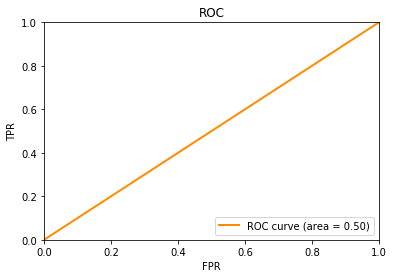

In [166]:
plt.figure()

plt.plot(fpr_KNN, tpr_KNN, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [167]:
from sklearn import metrics
AUC_KNN = metrics.auc(fpr_KNN, tpr_KNN)
print(AUC_KNN)

0.5


In [168]:

# 3.3 Using the model, test the test set, and report the testing confusion matrix, accuracy, precision, recall, F1-
# score, the ROC point on the ROC space.

In [183]:
print(scaled_trax.shape)
print(scaled_maintest.shape)

(50, 4)
(19999, 3)


In [169]:
predictions_knntest =[]
k = 3
for x in range(len(scaled_maintest)):
        neighbors_knntest = getNeighbors(scaled_trax,scaled_maintest[x], k)
        result_knntest = getResponse(neighbors)
        predictions_knntest.append(result)
        #print('> predicted=' + repr(predictions) + ', actual=' + repr(tes_y))
        #print(result)
print(predictions_knntest)

[0.22498852128662872, 0.22498852128662872, 0.22498852128662872, 0.22498852128662872, 0.22498852128662872, 0.22498852128662872, 0.22498852128662872, 0.22498852128662872, 0.22498852128662872, 0.22498852128662872, 0.22498852128662872, 0.22498852128662872, 0.22498852128662872, 0.22498852128662872, 0.22498852128662872, 0.22498852128662872, 0.22498852128662872, 0.22498852128662872, 0.22498852128662872, 0.22498852128662872, 0.22498852128662872, 0.22498852128662872, 0.22498852128662872, 0.22498852128662872, 0.22498852128662872, 0.22498852128662872, 0.22498852128662872, 0.22498852128662872, 0.22498852128662872, 0.22498852128662872, 0.22498852128662872, 0.22498852128662872, 0.22498852128662872, 0.22498852128662872, 0.22498852128662872, 0.22498852128662872, 0.22498852128662872, 0.22498852128662872, 0.22498852128662872, 0.22498852128662872, 0.22498852128662872, 0.22498852128662872, 0.22498852128662872, 0.22498852128662872, 0.22498852128662872, 0.22498852128662872, 0.22498852128662872, 0.2249885212

In [170]:
threshold = 0.5
for i in range(len(scaled_maintest)):
    if predictions_knntest[i] >= threshold:
        predictions_knntest[i] =1
        #print("inside if")
    else:
        predictions_knntest[i] = 0
       # print("inside else")
    
print(predictions_knntest)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

tn= 0
fp= 564
fn= 0
tp= 19435
accuracy = 0.9717985899294965
F1score = 0.9578995585170037
recal = 0.9717985899294965
precision = 0.9443924993889576
[0. 1.]
[0. 1.]
[1 0]
1.0
1.0


C:\Users\kusha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\kusha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


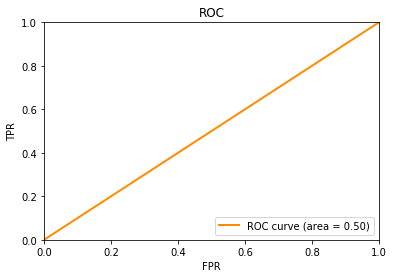

0.5


In [178]:
from sklearn.metrics import confusion_matrix
confusion_matrix(main_testy,predictions_knntest)

from sklearn.metrics import confusion_matrix
tp_KNNtest, fn_KNNtest, fp_KNNtest, tn_KNNtest = confusion_matrix(main_testy,predictions_knntest).ravel()
#t= confusion_matrix(testy,ypred_new)
print("tn=",tn_KNNtest)
print("fp=",fp_KNNtest)
print("fn=",fn_KNNtest)
print("tp=",tp_KNNtest)

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
accuracy_KNNtest = accuracy_score(main_testy,predictions_knntest)
f1score_KNNtest = f1_score(main_testy,predictions_knntest,average='weighted')
recall_KNNtest = recall_score(main_testy,predictions_knntest,average='weighted')
precision_KNNtest = precision_score(main_testy,predictions_knntest,average='weighted')

print("accuracy =" , accuracy_KNNtest)
print("F1score =" , f1score_KNNtest)
print("recal =" ,recall_KNNtest)
print("precision =", precision_KNNtest)


import numpy as np
from sklearn import metrics
N_KNNtest =fp_KNNtest+tn_KNNtest
P_KNNtest = tp_KNNtest+fn_KNNtest
FPR_KNNtest = fp_KNNtest/N_KNNtest
TPR_KNNtest =tp_KNNtest/P_KNNtest

fpr_KNNtest, tpr_KNNtest, threshold_KNNtest = metrics.roc_curve(main_testy,predictions_knntest)
roc_auc = metrics.auc(fpr_KNN, tpr_KNNtest)
print(fpr_KNNtest)
print(tpr_KNNtest)
print(threshold_KNNtest)



print(FPR_KNNtest)
print(TPR_KNNtest)



plt.figure()

plt.plot(fpr_KNNtest, tpr_KNNtest, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()



from sklearn import metrics
AUC_KNNtest = metrics.auc(fpr_KNNtest, tpr_KNNtest)
print(AUC_KNN)




In [ ]:

# 3.4 Looking at results obtained in Tasks 3.2 and 3.3: Is your classifier showing any sign of overfitting, or
# underfitting? And explain why do you think that. If yes, can you suggest a solution, and utilize it to solve the
# issue (if present).

In [ ]:
#accuracy is good so we cant say it is under fitting or over fitting 
# so we cant suggest any methods also

In [ ]:

# 3.5 (Graduate Student Requirement) Dataset follows a highly skewed distribution in terms of the target class
# label. Can you devise a workaround to this? Please explain and redo tasks 3.1, 3.2, 3.3, and 3.4.

In [ ]:
#WE CAN DO UNDER SAMPLING AS SHOWN BELOW

Skewness: 5.891257
2654
Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            99989, 99990, 99991, 99992, 99993, 99994, 99995, 99996, 99997,
            99998],
           dtype='int64', length=97345)
[59690 23260 46291 ... 75533 57810 55142]
Int64Index([  111,   157,   181,   191,   201,   217,   219,   220,   275,
              280,
            ...
            99803, 99835, 99851, 99857, 99901, 99905, 99909, 99924, 99928,
            99942],
           dtype='int64', length=2654)
[  111   157   181 ... 75533 57810 55142]
       0
111    1
157    1
181    1
191    1
201    1
217    1
219    1
220    1
275    1
280    1
296    1
335    1
343    1
352    1
619    1
642    1
643    1
652    1
660    1
788    1
812    1
825    1
875    1
963    1
966    1
1016   1
1031   1
1045   1
1074   1
1093   1
...   ..
98025  0
93343  0
77197  0
67832  0
13720  0
65576  0
88615  0
7514   0
6467   0
71536  0
25965  0
344    0
95527  

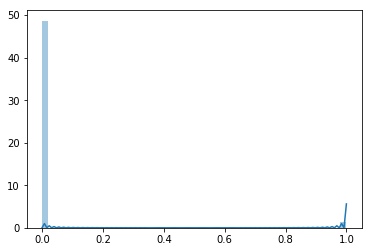

In [187]:
import seaborn as sns
sns.distplot(dataBY);

print("Skewness: %f" % dataBY.skew())

no_frauds = len(dataBY[dataBY['0'] == 1])
print(no_frauds)

non_fraud_indices = dataBY[dataBY['0'] == 0].index
print(non_fraud_indices)

random_indices = np.random.choice(non_fraud_indices,no_frauds, replace=False)
print(random_indices)

fraud_indices = dataBY[dataBY['0'] == 1].index
print(fraud_indices)

under_sample_indices = np.concatenate([fraud_indices,random_indices])
print(under_sample_indices)

under_sample = dataBY.loc[under_sample_indices]
print(under_sample)

In [ ]:
# Task 4 : Comparing performances of LR, NB and kNN classifiers
# 4.1 The CoinBank manager asks you to choose one classifier for her which is less likely to miss any fraudulent
# transaction. With the help of a cost matrix, can you suggest her the best classifier from the three you developed
# in Task 1, 2 and 3? Which one would you pick, and why?

In [179]:
def cost(tp,fp,tn,fn):
    cost = (tp*-1) + (fp*1) +(tn*0) +(fn*100)
    return cost

In [180]:
#logistic regression 
cost1 = cost(0,0,564,19435)
print(cost1)

#NB
cost2 = cost(9774,301,263,9661)
print(cost2)

#knn
cost3 =cost(19435,564,0,0)
print(cost3)


1943500
956627
-18871


In [ ]:

# 4.2. CoinBank manager is also looking for an alternate classifier which will not make the legitimate customers
# angry due to the fact that the classifier you chose in Task 4.1 is going to raise a lot of false alarms. With the help
# of a cost matrix, can you suggest the best classifier from the three you developed? Which one would you pick,
# and why?

In [ ]:
# from the cost matrix i will suggest KNN classifier as it is more efficient . it has less cost . 

In [ ]:

# 4.3 Which of the three classifiers do you think would be a balanced choice for CoinBank? And why?

In [ ]:
#KNN because it takes into consideration the neighbours and decides based on the maximum vote .